### MACHINE LEARNING MODELS FOR THE DIABETES DATASET (RAW)

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import shap
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [4]:
df = pd.read_csv("/home/carmen/Escritorio/TFM/ml_anonymization/datasets/bank_dataset/csv/bank-additional-full_raw.csv", sep=";")

**We check that we have loaded the dataset correctly by showing the first 5 rows of the dataset**

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**We explore the original dataset**

In [6]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

**We check if there is any null value to remove it if exists:**

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Eliminamos datos duplicados si los hubiese**

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Eliminamos las columnas que no son relevantes para nuestro análisis**
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Duration is dropped as the attribute highly affects the outcome of the predictions. This happens beacuse if the duration is cero or any other low value, it means that the call has been really short and no customers subscribed to the banking product. On the other hand, if the call was long enough, it usually means that the client did subscribe to the proposed product. Therefore, this attribute is dropped from the dataset for the analysis.

In [10]:
df = df.drop(["duration", "campaign", "pdays", "previous", "poutcome"], axis=1)

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,-1.1,94.767,-50.8,1.028,4963.6,yes


**Convertimos las variables categóricas a factores:**

In [12]:
df["job"] = df["job"].astype("category").cat.codes
df["marital"] = df["marital"].astype("category").cat.codes
df["education"] = df["education"].astype("category").cat.codes
df["default"] = df["default"].astype("category").cat.codes
df["housing"] = df["housing"].astype("category").cat.codes
df["loan"] = df["loan"].astype("category").cat.codes
df["contact"] = df["contact"].astype("category").cat.codes
df["month"] = df["month"].astype("category").cat.codes
df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
df["y"] = df["y"].astype("category").cat.codes

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,0


**Dividimos el dataset en train y en test**

In [14]:
X = df.drop(["y"], axis=1)
y = df["y"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14, stratify=y)

**We check that the shapes of the splitted sets are correct as expected**

In [15]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Finally we do the scaling in train and test separately**

We scale variables separately in train and test because this way we avoid biases. In addition, we manage to maintain the relative scale, i.e., all characteristics have a similar scale.

In [16]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30882, 15)
X_test shape: (10294, 15)
y_train: (30882,)
y_test shape: (10294,)


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [18]:
y_pred_logistic = model.predict(X_test)

We evaluate the model obtained:

In [19]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)

Accuracy: 0.8895473091121041
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.53      0.17      0.26      1160

    accuracy                           0.89     10294
   macro avg       0.72      0.58      0.60     10294
weighted avg       0.86      0.89      0.86     10294



### KNN

We choose the different parameters for gridSearch

In [20]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [21]:
knn = KNeighborsClassifier()


We create the GridSearch object

In [22]:
# refit true, para que entrenemos con todos los datos
grid_search = GridSearchCV(knn, param_grid, cv=5, refit=True)

We make the model fit

In [23]:
grid_search.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0ad360>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0ae4d0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0af910>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0ad360>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0ad360>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f10ae0af250>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [25]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy score: 0.8913606624860233


Get the best model and its predictions

In [26]:
best_model_knn = grid_search.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Evaluate the best model over test partition

In [27]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.8910044686224985
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.54      0.22      0.31      1160

    accuracy                           0.89     10294
   macro avg       0.72      0.60      0.63     10294
weighted avg       0.87      0.89      0.87     10294



### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [28]:
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [29]:
model_ct = DecisionTreeClassifier(random_state=14)

We create the GridSearch object

In [30]:
grid_search = GridSearchCV(model_ct, param_grid, cv=5)

We make the model fit

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=14),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [32]:
best_model_ct = grid_search.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [33]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.8917816203613755
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.55      0.21      0.31      1160

    accuracy                           0.89     10294
   macro avg       0.73      0.60      0.62     10294
weighted avg       0.87      0.89      0.87     10294



### RANDOM FOREST

We choose the different parameters for gridSearch

In [34]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [36]:
rfc = RandomForestClassifier(random_state=14)

We create the GridSearch object

In [37]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)

We make the model fit

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [39]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy score: 0.8956674476014564


In [40]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [41]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8965416747619973
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.60      0.24      0.34      1160

    accuracy                           0.90     10294
   macro avg       0.76      0.61      0.64     10294
weighted avg       0.88      0.90      0.88     10294



### SVM (Support Vector Machine)

In [43]:
param_grid = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [44]:
svm = SVC()

In [45]:
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [47]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy score: 0.8939835412331053


In [48]:
best_model_svm = grid_search.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [49]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8922673401981737
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.56      0.20      0.29      1160

    accuracy                           0.89     10294
   macro avg       0.73      0.59      0.62     10294
weighted avg       0.87      0.89      0.87     10294



### NEURAL NETWORK:

We start creating the model function

In [50]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search = GridSearchCV(model_nn, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search.best_params_
best_params_nn

Epoch 1/10


2023-06-28 18:42:51.340546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1287/1287 [==============================] - 1s 780us/step - loss: 0.2969 - accuracy: 0.8912
Epoch 2/10
1287/1287 [==============================] - 1s 767us/step - loss: 0.2882 - accuracy: 0.8934
Epoch 3/10
1287/1287 [==============================] - 1s 728us/step - loss: 0.2848 - accuracy: 0.8944
Epoch 4/10
1287/1287 [==============================] - 1s 725us/step - loss: 0.2840 - accuracy: 0.8945
Epoch 5/10
1287/1287 [==============================] - 1s 725us/step - loss: 0.2827 - accuracy: 0.8952
Epoch 6/10
1287/1287 [==============================] - 1s 721us/step - loss: 0.2820 - accuracy: 0.8954
Epoch 7/10
1287/1287 [==============================] - 1s 720us/step - loss: 0.2817 - accuracy: 0.8951
Epoch 8/10
1287/1287 [==============================] - 1s 725us/step - loss: 0.2811 - accuracy: 0.8957
Epoch 9/10
1287/1287 [==============================] - 1s 723us/step - loss: 0.2798 - accuracy: 0.8952
Epoch 10/10
644/644 [==============================] - 0s 512us/step - loss

1287/1287 [==============================] - 1s 785us/step - loss: 0.2910 - accuracy: 0.8925
Epoch 4/10
1287/1287 [==============================] - 1s 778us/step - loss: 0.2894 - accuracy: 0.8927
Epoch 5/10
1287/1287 [==============================] - 1s 778us/step - loss: 0.2885 - accuracy: 0.8929
Epoch 6/10
1287/1287 [==============================] - 1s 774us/step - loss: 0.2877 - accuracy: 0.8927
Epoch 7/10
1287/1287 [==============================] - 1s 791us/step - loss: 0.2866 - accuracy: 0.8924
Epoch 8/10
1287/1287 [==============================] - 1s 822us/step - loss: 0.2862 - accuracy: 0.8925
Epoch 9/10
1287/1287 [==============================] - 1s 819us/step - loss: 0.2863 - accuracy: 0.8939
Epoch 10/10
644/644 [==============================] - 0s 528us/step - loss: 0.2792 - accuracy: 0.8966
Epoch 1/10
1287/1287 [==============================] - 1s 775us/step - loss: 0.2984 - accuracy: 0.8908
Epoch 2/10
1287/1287 [==============================] - 1s 780us/step - loss

1287/1287 [==============================] - 1s 798us/step - loss: 0.2757 - accuracy: 0.8994
Epoch 19/20
1287/1287 [==============================] - 1s 774us/step - loss: 0.2755 - accuracy: 0.8996
Epoch 20/20
644/644 [==============================] - 0s 535us/step - loss: 0.2885 - accuracy: 0.8911
Epoch 1/20
1287/1287 [==============================] - 2s 759us/step - loss: 0.2931 - accuracy: 0.8923
Epoch 2/20
1287/1287 [==============================] - 1s 791us/step - loss: 0.2862 - accuracy: 0.8937
Epoch 3/20
1287/1287 [==============================] - 1s 815us/step - loss: 0.2853 - accuracy: 0.8940
Epoch 4/20
1287/1287 [==============================] - 1s 813us/step - loss: 0.2840 - accuracy: 0.8950
Epoch 5/20
1287/1287 [==============================] - 1s 812us/step - loss: 0.2826 - accuracy: 0.8946
Epoch 6/20
1287/1287 [==============================] - 1s 814us/step - loss: 0.2816 - accuracy: 0.8947
Epoch 7/20
1287/1287 [==============================] - 1s 819us/step - los

1287/1287 [==============================] - 1s 840us/step - loss: 0.2778 - accuracy: 0.8976
Epoch 14/20
1287/1287 [==============================] - 1s 818us/step - loss: 0.2775 - accuracy: 0.8981
Epoch 15/20
1287/1287 [==============================] - 1s 832us/step - loss: 0.2771 - accuracy: 0.8973
Epoch 16/20
1287/1287 [==============================] - 1s 820us/step - loss: 0.2760 - accuracy: 0.8984
Epoch 17/20
1287/1287 [==============================] - 1s 832us/step - loss: 0.2751 - accuracy: 0.8980
Epoch 18/20
1287/1287 [==============================] - 1s 826us/step - loss: 0.2744 - accuracy: 0.8989
Epoch 19/20
1287/1287 [==============================] - 1s 827us/step - loss: 0.2736 - accuracy: 0.8989
Epoch 20/20
644/644 [==============================] - 0s 552us/step - loss: 0.2916 - accuracy: 0.8905
Epoch 1/20
1287/1287 [==============================] - 1s 793us/step - loss: 0.3033 - accuracy: 0.8870
Epoch 2/20
1287/1287 [==============================] - 1s 820us/step 

1287/1287 [==============================] - 1s 911us/step - loss: 0.2684 - accuracy: 0.9023
Epoch 29/30
1287/1287 [==============================] - 1s 894us/step - loss: 0.2666 - accuracy: 0.9032
Epoch 30/30
644/644 [==============================] - 0s 632us/step - loss: 0.2993 - accuracy: 0.8898
Epoch 1/30
1287/1287 [==============================] - 2s 900us/step - loss: 0.3025 - accuracy: 0.8886
Epoch 2/30
1287/1287 [==============================] - 1s 901us/step - loss: 0.2920 - accuracy: 0.8913
Epoch 3/30
1287/1287 [==============================] - 1s 905us/step - loss: 0.2905 - accuracy: 0.8925
Epoch 4/30
1287/1287 [==============================] - 1s 899us/step - loss: 0.2896 - accuracy: 0.8925
Epoch 5/30
1287/1287 [==============================] - 1s 905us/step - loss: 0.2880 - accuracy: 0.8926
Epoch 6/30
1287/1287 [==============================] - 1s 903us/step - loss: 0.2877 - accuracy: 0.8936
Epoch 7/30
1287/1287 [==============================] - 1s 902us/step - los

1287/1287 [==============================] - 1s 932us/step - loss: 0.2777 - accuracy: 0.8969
Epoch 14/30
1287/1287 [==============================] - 1s 945us/step - loss: 0.2772 - accuracy: 0.8973
Epoch 15/30
1287/1287 [==============================] - 1s 938us/step - loss: 0.2765 - accuracy: 0.8982
Epoch 16/30
1287/1287 [==============================] - 1s 922us/step - loss: 0.2761 - accuracy: 0.8988
Epoch 17/30
1287/1287 [==============================] - 1s 933us/step - loss: 0.2749 - accuracy: 0.8989
Epoch 18/30
1287/1287 [==============================] - 1s 933us/step - loss: 0.2746 - accuracy: 0.8994
Epoch 19/30
1287/1287 [==============================] - 1s 928us/step - loss: 0.2728 - accuracy: 0.8996
Epoch 20/30
1287/1287 [==============================] - 1s 932us/step - loss: 0.2722 - accuracy: 0.9006
Epoch 21/30
1287/1287 [==============================] - 1s 928us/step - loss: 0.2718 - accuracy: 0.8995
Epoch 22/30
1287/1287 [==============================] - 1s 927us/s

1287/1287 [==============================] - 1s 956us/step - loss: 0.2646 - accuracy: 0.9032
Epoch 30/30
644/644 [==============================] - 0s 627us/step - loss: 0.2943 - accuracy: 0.8870
Epoch 1/30
1287/1287 [==============================] - 2s 988us/step - loss: 0.2951 - accuracy: 0.8916
Epoch 2/30
1287/1287 [==============================] - 1s 976us/step - loss: 0.2871 - accuracy: 0.8932
Epoch 3/30
1287/1287 [==============================] - 1s 979us/step - loss: 0.2854 - accuracy: 0.8937
Epoch 4/30
1287/1287 [==============================] - 1s 972us/step - loss: 0.2846 - accuracy: 0.8935
Epoch 5/30
1287/1287 [==============================] - 1s 972us/step - loss: 0.2831 - accuracy: 0.8946
Epoch 6/30
1287/1287 [==============================] - 1s 983us/step - loss: 0.2825 - accuracy: 0.8961
Epoch 7/30
1287/1287 [==============================] - 1s 980us/step - loss: 0.2817 - accuracy: 0.8954
Epoch 8/30
1287/1287 [==============================] - 1s 1ms/step - loss: 

1287/1287 [==============================] - 1s 975us/step - loss: 0.2780 - accuracy: 0.8979
Epoch 15/30
1287/1287 [==============================] - 1s 979us/step - loss: 0.2771 - accuracy: 0.8991
Epoch 16/30
1287/1287 [==============================] - 1s 981us/step - loss: 0.2762 - accuracy: 0.8997
Epoch 17/30
1287/1287 [==============================] - 1s 984us/step - loss: 0.2757 - accuracy: 0.8997
Epoch 18/30
1287/1287 [==============================] - 1s 977us/step - loss: 0.2746 - accuracy: 0.8997
Epoch 19/30
1287/1287 [==============================] - 1s 981us/step - loss: 0.2747 - accuracy: 0.8990
Epoch 20/30
1287/1287 [==============================] - 1s 977us/step - loss: 0.2725 - accuracy: 0.9002
Epoch 21/30
1287/1287 [==============================] - 1s 977us/step - loss: 0.2718 - accuracy: 0.9012
Epoch 22/30
1287/1287 [==============================] - 1s 990us/step - loss: 0.2706 - accuracy: 0.9002
Epoch 23/30
1287/1287 [==============================] - 1s 975us/s

644/644 [==============================] - 1s 979us/step - loss: 0.2821 - accuracy: 0.8951
Epoch 9/10
644/644 [==============================] - 1s 978us/step - loss: 0.2818 - accuracy: 0.8961
Epoch 10/10
322/322 [==============================] - 0s 659us/step - loss: 0.2861 - accuracy: 0.8929
Epoch 1/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2959 - accuracy: 0.8912
Epoch 2/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2865 - accuracy: 0.8936
Epoch 3/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2858 - accuracy: 0.8950
Epoch 4/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2840 - accuracy: 0.8947
Epoch 5/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8950
Epoch 6/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.8953
Epoch 7/10
644/644 [==============================] - 1s 1ms/step - loss: 0.2816 - accuracy: 0.8948
Epoc

644/644 [==============================] - 1s 914us/step - loss: 0.2878 - accuracy: 0.8927
Epoch 4/20
644/644 [==============================] - 1s 910us/step - loss: 0.2867 - accuracy: 0.8935
Epoch 5/20
644/644 [==============================] - 1s 901us/step - loss: 0.2854 - accuracy: 0.8945
Epoch 6/20
644/644 [==============================] - 1s 916us/step - loss: 0.2851 - accuracy: 0.8943
Epoch 7/20
644/644 [==============================] - 1s 901us/step - loss: 0.2841 - accuracy: 0.8940
Epoch 8/20
644/644 [==============================] - 1s 910us/step - loss: 0.2837 - accuracy: 0.8948
Epoch 9/20
644/644 [==============================] - 1s 916us/step - loss: 0.2827 - accuracy: 0.8949
Epoch 10/20
644/644 [==============================] - 1s 916us/step - loss: 0.2822 - accuracy: 0.8963
Epoch 11/20
644/644 [==============================] - 1s 911us/step - loss: 0.2820 - accuracy: 0.8959
Epoch 12/20
644/644 [==============================] - 1s 927us/step - loss: 0.2813 - accur

322/322 [==============================] - 0s 650us/step - loss: 0.2872 - accuracy: 0.8927
Epoch 1/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2979 - accuracy: 0.8902
Epoch 2/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2867 - accuracy: 0.8935
Epoch 3/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2861 - accuracy: 0.8933
Epoch 4/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2838 - accuracy: 0.8946
Epoch 5/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.8959
Epoch 6/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2831 - accuracy: 0.8953
Epoch 7/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.8957
Epoch 8/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2811 - accuracy: 0.8959
Epoch 9/20
644/644 [==============================] - 1s 1ms/step - loss: 0.2799 - accuracy: 0.8962
Epoch 10/

644/644 [==============================] - 1s 934us/step - loss: 0.2766 - accuracy: 0.8982
Epoch 18/30
644/644 [==============================] - 1s 940us/step - loss: 0.2758 - accuracy: 0.8978
Epoch 19/30
644/644 [==============================] - 1s 931us/step - loss: 0.2751 - accuracy: 0.8991
Epoch 20/30
644/644 [==============================] - 1s 925us/step - loss: 0.2748 - accuracy: 0.8991
Epoch 21/30
644/644 [==============================] - 1s 922us/step - loss: 0.2735 - accuracy: 0.8995
Epoch 22/30
644/644 [==============================] - 1s 927us/step - loss: 0.2740 - accuracy: 0.9002
Epoch 23/30
644/644 [==============================] - 1s 939us/step - loss: 0.2731 - accuracy: 0.9003
Epoch 24/30
644/644 [==============================] - 1s 941us/step - loss: 0.2718 - accuracy: 0.9008
Epoch 25/30
644/644 [==============================] - 1s 928us/step - loss: 0.2710 - accuracy: 0.9005
Epoch 26/30
644/644 [==============================] - 1s 931us/step - loss: 0.2710 -

644/644 [==============================] - 1s 976us/step - loss: 0.2843 - accuracy: 0.8946
Epoch 5/30
644/644 [==============================] - 1s 977us/step - loss: 0.2825 - accuracy: 0.8959
Epoch 6/30
644/644 [==============================] - 1s 966us/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/30
644/644 [==============================] - 1s 989us/step - loss: 0.2813 - accuracy: 0.8953
Epoch 8/30
644/644 [==============================] - 1s 980us/step - loss: 0.2815 - accuracy: 0.8963
Epoch 9/30
644/644 [==============================] - 1s 977us/step - loss: 0.2803 - accuracy: 0.8959
Epoch 10/30
644/644 [==============================] - 1s 982us/step - loss: 0.2798 - accuracy: 0.8972
Epoch 11/30
644/644 [==============================] - 1s 978us/step - loss: 0.2791 - accuracy: 0.8962
Epoch 12/30
644/644 [==============================] - 1s 978us/step - loss: 0.2785 - accuracy: 0.8962
Epoch 13/30
644/644 [==============================] - 1s 974us/step - loss: 0.2778 - accu

644/644 [==============================] - 1s 985us/step - loss: 0.2696 - accuracy: 0.9010
Epoch 23/30
644/644 [==============================] - 1s 961us/step - loss: 0.2693 - accuracy: 0.9008
Epoch 24/30
644/644 [==============================] - 1s 976us/step - loss: 0.2684 - accuracy: 0.9018
Epoch 25/30
644/644 [==============================] - 1s 976us/step - loss: 0.2674 - accuracy: 0.9021
Epoch 26/30
644/644 [==============================] - 1s 979us/step - loss: 0.2654 - accuracy: 0.9034
Epoch 27/30
644/644 [==============================] - 1s 977us/step - loss: 0.2644 - accuracy: 0.9046
Epoch 28/30
644/644 [==============================] - 1s 967us/step - loss: 0.2632 - accuracy: 0.9033
Epoch 29/30
644/644 [==============================] - 1s 988us/step - loss: 0.2620 - accuracy: 0.9046
Epoch 30/30
322/322 [==============================] - 0s 660us/step - loss: 0.3003 - accuracy: 0.8906
Epoch 1/30
644/644 [==============================] - 1s 1ms/step - loss: 0.3029 - ac

644/644 [==============================] - 1s 1ms/step - loss: 0.2806 - accuracy: 0.8974
Epoch 11/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2804 - accuracy: 0.8969
Epoch 12/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8971
Epoch 13/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2788 - accuracy: 0.8976
Epoch 14/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.8978
Epoch 15/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2766 - accuracy: 0.8984
Epoch 16/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2759 - accuracy: 0.8985
Epoch 17/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2750 - accuracy: 0.8994
Epoch 18/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2738 - accuracy: 0.8993
Epoch 19/30
644/644 [==============================] - 1s 1ms/step - loss: 0.2721 - accuracy: 0.8999
Ep

322/322 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8949
Epoch 6/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.8951
Epoch 7/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.8947
Epoch 8/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8944
Epoch 9/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8959
Epoch 10/10
161/161 [==============================] - 0s 682us/step - loss: 0.2914 - accuracy: 0.8923
Epoch 1/10
322/322 [==============================] - 1s 1ms/step - loss: 0.3055 - accuracy: 0.8870
Epoch 2/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2870 - accuracy: 0.8915
Epoch 3/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8949
Epoch 4/10
322/322 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8950
Epoch 5/

161/161 [==============================] - 0s 708us/step - loss: 0.2805 - accuracy: 0.8936
Epoch 1/20
322/322 [==============================] - 1s 957us/step - loss: 0.3136 - accuracy: 0.8878
Epoch 2/20
322/322 [==============================] - 0s 962us/step - loss: 0.2890 - accuracy: 0.8926
Epoch 3/20
322/322 [==============================] - 0s 953us/step - loss: 0.2877 - accuracy: 0.8931
Epoch 4/20
322/322 [==============================] - 0s 978us/step - loss: 0.2863 - accuracy: 0.8938
Epoch 5/20
322/322 [==============================] - 0s 967us/step - loss: 0.2856 - accuracy: 0.8932
Epoch 6/20
322/322 [==============================] - 0s 966us/step - loss: 0.2856 - accuracy: 0.8940
Epoch 7/20
322/322 [==============================] - 0s 965us/step - loss: 0.2842 - accuracy: 0.8950
Epoch 8/20
322/322 [==============================] - 0s 969us/step - loss: 0.2841 - accuracy: 0.8953
Epoch 9/20
322/322 [==============================] - 0s 979us/step - loss: 0.2831 - accuracy

322/322 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.8992
Epoch 19/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8995
Epoch 20/20
161/161 [==============================] - 0s 698us/step - loss: 0.2873 - accuracy: 0.8911
Epoch 1/20
322/322 [==============================] - 1s 1ms/step - loss: 0.3062 - accuracy: 0.8878
Epoch 2/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8926
Epoch 3/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.8934
Epoch 4/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8944
Epoch 5/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8943
Epoch 6/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/20
322/322 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8951
Epoch 8

322/322 [==============================] - 0s 960us/step - loss: 0.2782 - accuracy: 0.8970
Epoch 16/30
322/322 [==============================] - 0s 963us/step - loss: 0.2781 - accuracy: 0.8980
Epoch 17/30
322/322 [==============================] - 0s 960us/step - loss: 0.2765 - accuracy: 0.8974
Epoch 18/30
322/322 [==============================] - 0s 961us/step - loss: 0.2766 - accuracy: 0.8981
Epoch 19/30
322/322 [==============================] - 0s 958us/step - loss: 0.2763 - accuracy: 0.8982
Epoch 20/30
322/322 [==============================] - 0s 959us/step - loss: 0.2759 - accuracy: 0.8987
Epoch 21/30
322/322 [==============================] - 0s 953us/step - loss: 0.2751 - accuracy: 0.8987
Epoch 22/30
322/322 [==============================] - 0s 960us/step - loss: 0.2749 - accuracy: 0.8994
Epoch 23/30
322/322 [==============================] - 0s 979us/step - loss: 0.2755 - accuracy: 0.8984
Epoch 24/30
322/322 [==============================] - 0s 952us/step - loss: 0.2737 -

322/322 [==============================] - 0s 999us/step - loss: 0.2864 - accuracy: 0.8942
Epoch 3/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8947
Epoch 4/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8946
Epoch 5/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8949
Epoch 6/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8951
Epoch 7/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.8954
Epoch 8/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.8959
Epoch 9/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8964
Epoch 10/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8971
Epoch 11/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8976
Epoch 1

322/322 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8997
Epoch 22/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8993
Epoch 23/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8991
Epoch 24/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.9003
Epoch 25/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9010
Epoch 26/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.9018
Epoch 27/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9000
Epoch 28/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.9013
Epoch 29/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9026
Epoch 30/30
161/161 [==============================] - 0s 707us/step - loss: 0.2976 - accuracy: 0.8870


322/322 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8963
Epoch 10/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.8954
Epoch 11/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.8953
Epoch 12/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8975
Epoch 13/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8974
Epoch 14/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8971
Epoch 15/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8978
Epoch 16/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8989
Epoch 17/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8982
Epoch 18/30
322/322 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8975
Ep

{'batch_size': 32, 'epochs': 20, 'hidden_units': 64}

In [51]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/20
966/966 [==============================] - 1s 975us/step - loss: 0.2982 - accuracy: 0.8898
Epoch 2/20
966/966 [==============================] - 1s 933us/step - loss: 0.2885 - accuracy: 0.8930
Epoch 3/20
966/966 [==============================] - 1s 950us/step - loss: 0.2865 - accuracy: 0.8938
Epoch 4/20
966/966 [==============================] - 1s 941us/step - loss: 0.2862 - accuracy: 0.8935
Epoch 5/20
966/966 [==============================] - 1s 938us/step - loss: 0.2845 - accuracy: 0.8936
Epoch 6/20
966/966 [==============================] - 1s 937us/step - loss: 0.2842 - accuracy: 0.8951
Epoch 7/20
966/966 [==============================] - 1s 935us/step - loss: 0.2837 - accuracy: 0.8943
Epoch 8/20
966/966 [==============================] - 1s 942us/step - loss: 0.2831 - accuracy: 0.8957
Epoch 9/20
966/966 [==============================] - 1s 944us/step - loss: 0.2821 - accuracy: 0.8957
Epoch 10/20
966/966 [==============================] - 1s 967us/step - loss: 0.281

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (precision*100))
print('Recall: %.2f' % (recall*100))
print('F1-score: %.2f' % (f1*100))

322/322 [==============================] - 0s 609us/step
Accuracy: 89.00
Precision: 53.24
Recall: 19.83
F1-score: 28.89


In [53]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy*100:.2f}%')

Best Parameters:  {'batch_size': 32, 'epochs': 20, 'hidden_units': 64}
Test Accuracy: 89.00%


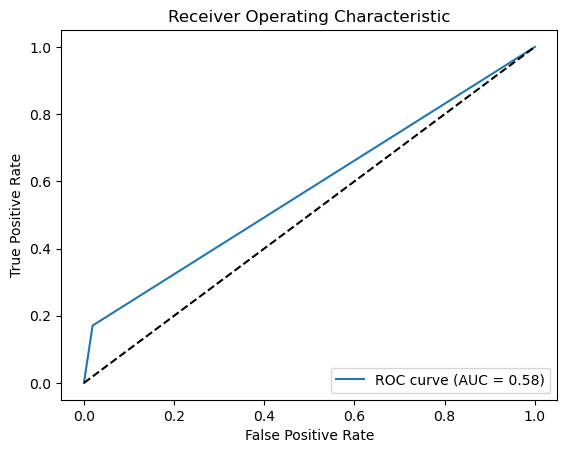

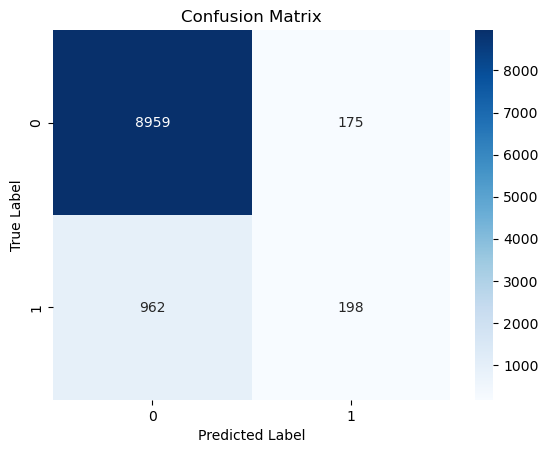

In [54]:
# Obtener las probabilidades de predicción
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Paso 6: Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred_prob)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AdaBoost (Adaptative Boosting):

In [56]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search = GridSearchCV(ada_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 85.93%


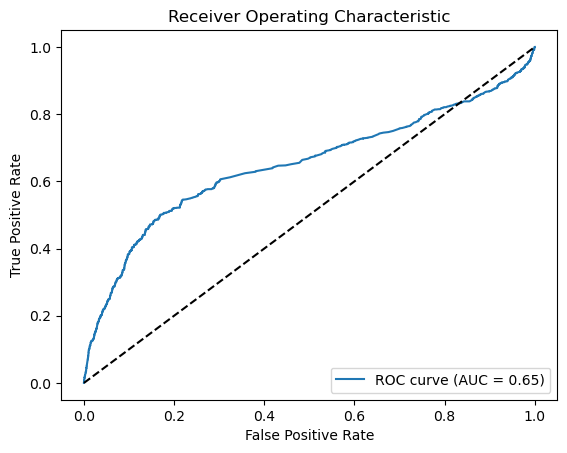

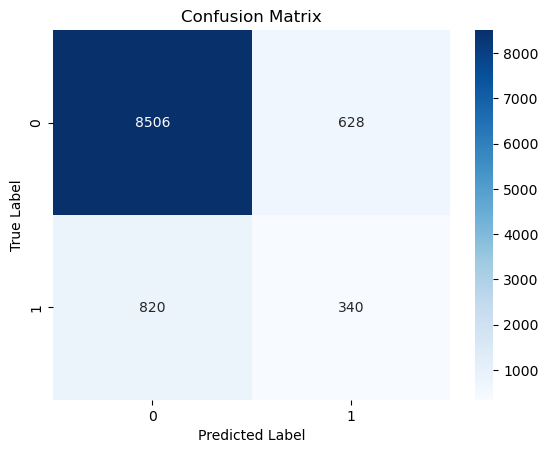

In [57]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_ada_boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_ada_boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [58]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 89.58%


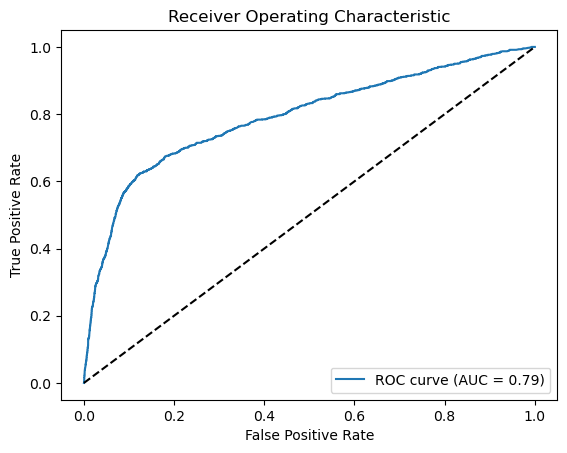

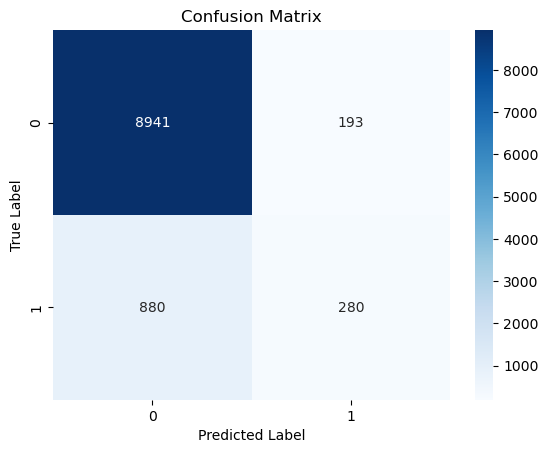

In [59]:
# Generate ROC curve and calculate AUC
y_pred_prob = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred = best_gradient_boosting.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
